In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv('../../data/events.csv', low_memory=False)

data['fecha'] = pd.to_datetime(data['timestamp'], errors='coerce')
data['mes'] = data['fecha'].dt.month
data['dayofyear'] = data['fecha'].dt.dayofyear

sns.set(style="white", context="talk")

## Análisis de productos
Revisaré cuáles son los productos más visitados, más vendidos

### Producto más vendido

Text(0,0.5,'Cantidad de ventas')

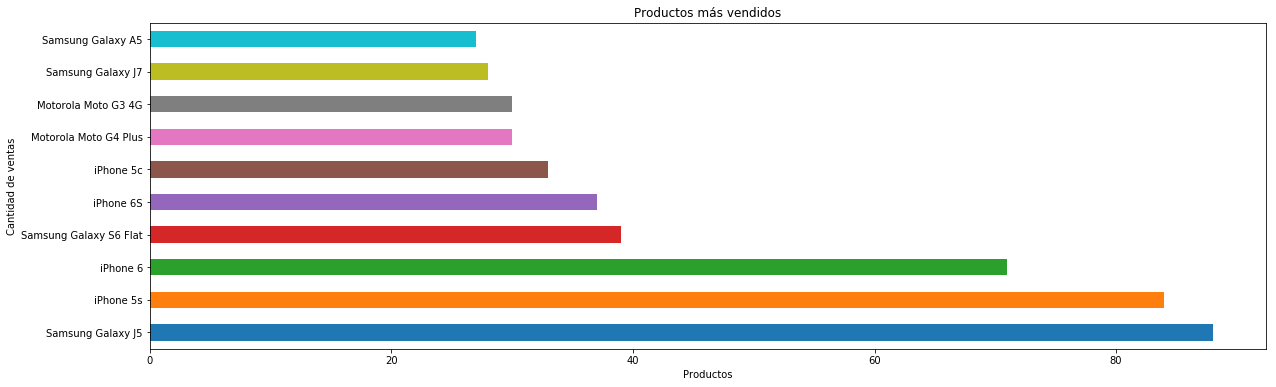

In [36]:
productos_mas_vendidos = data[data['event'] == 'conversion']
graf = productos_mas_vendidos['model'].value_counts().head(10).plot(kind = 'barh', figsize = (20, 6))
graf.set_title('Productos más vendidos')
graf.set_xlabel('Productos')
graf.set_ylabel('Cantidad de ventas')

### Producto más visitado

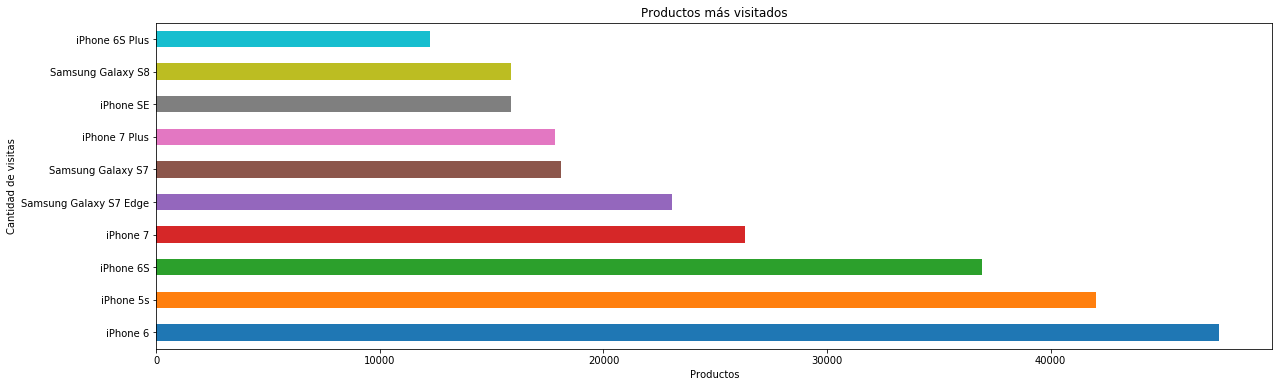

In [35]:
productos_mas_visitados = data[data['event'] == 'viewed product']
graf = productos_mas_visitados['model'].value_counts().head(10).plot(kind = 'barh', figsize = (20, 6))
graf.set_title('Productos más visitados')
graf.set_xlabel('Productos')
graf.set_ylabel('Cantidad de visitas')
graf.set_facecolor('w')

** Los colores no coinciden en ambos gráficos. Ojo **

### Progreso de venta de productos más vendidos a lo largo de los meses

In [132]:
productos_mas_vendidos = data[data['event'] == 'conversion']
lista_mas_vendidos = productos_mas_vendidos['model'].value_counts().head(7).to_frame().reset_index()['index'].values # TODO: MEJORAR ESTO PORQUE ES HORRIBLE
productos_mas_visitados = data[data['event'] == 'viewed product']
lista_mas_visitados = productos_mas_visitados['model'].value_counts().head(7).to_frame().reset_index()['index'].values # TODO: MEJORAR ESTO PORQUE ES HORRIBLE


Text(0,0.5,'Cantidad de ventas')

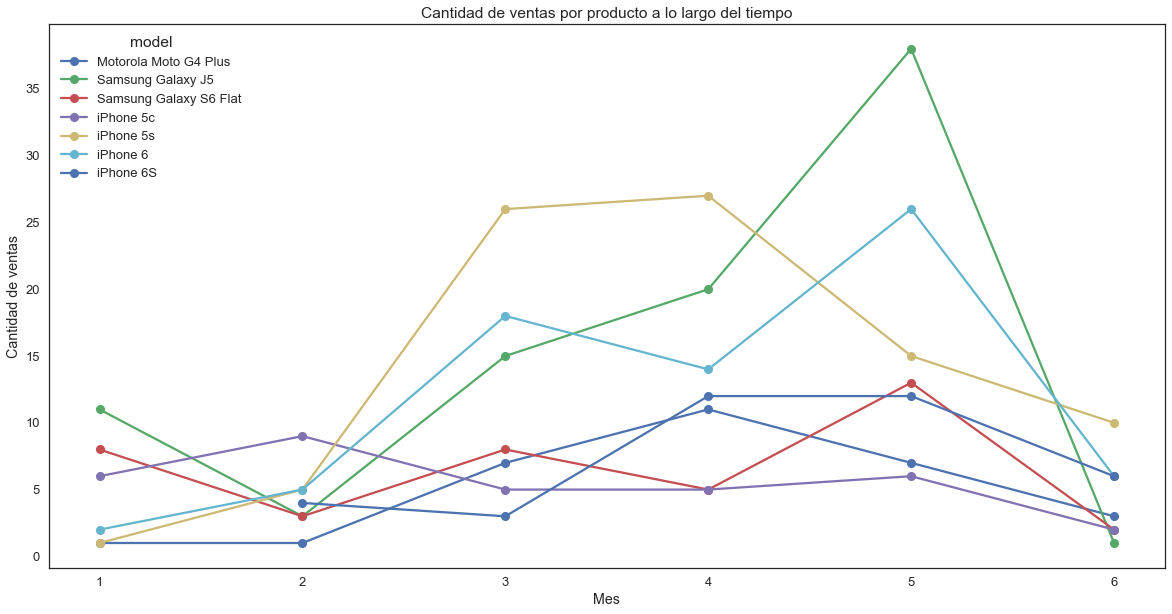

In [143]:
# filtro = data[(data['event'] == 'viewed product') | (data['event'] == 'conversion')]
filtro = data[data['event'] == 'conversion']
filtro = filtro[filtro['model'].isin(lista_mas_vendidos)]
filtro = filtro.groupby(['mes', 'model']).size().unstack('model')

plot = filtro.plot(figsize = (20, 10), style = 'o-')
plot.set_title('Cantidad de ventas por producto a lo largo del tiempo')
plot.set_xlabel('Mes')
plot.set_ylabel('Cantidad de ventas')

### Progreso de visita de los productos más visitados a lo largo de los meses

Text(0,0.5,'Cantidad de visitas')

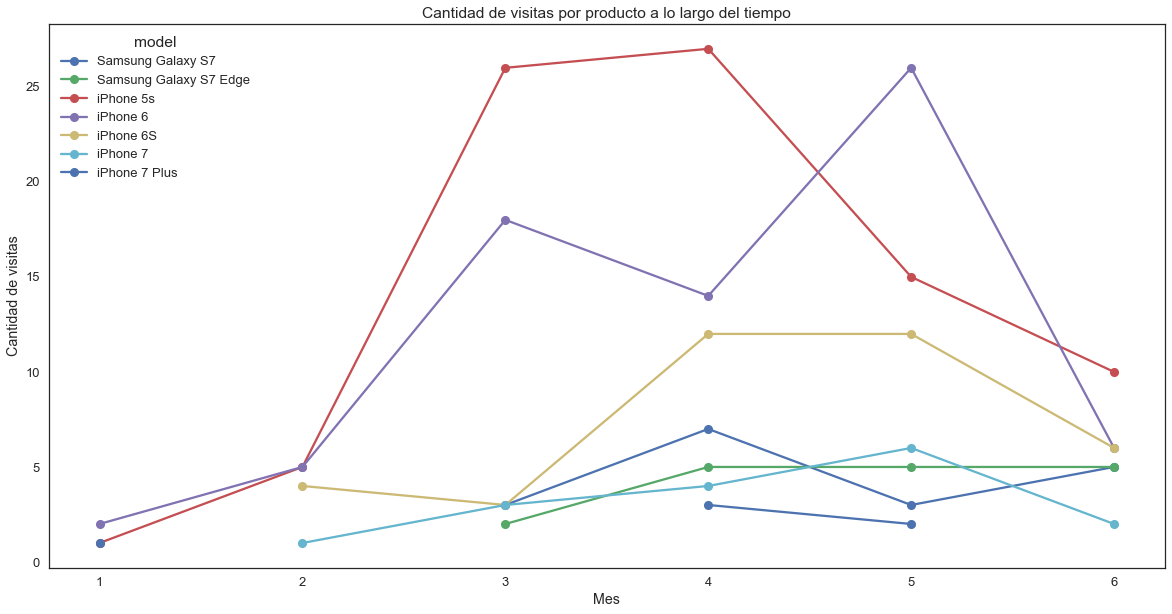

In [142]:
# filtro = data[(data['event'] == 'viewed product') | (data['event'] == 'conversion')]
filtro = data[data['event'] == 'conversion']
filtro = filtro[filtro['model'].isin(lista_mas_visitados)]
filtro = filtro.groupby(['mes', 'model']).size().unstack('model')

plot = filtro.plot(figsize = (20, 10), style = 'o-')
plot.set_title('Cantidad de visitas por producto a lo largo del tiempo')
plot.set_xlabel('Mes')
plot.set_ylabel('Cantidad de visitas')